## 선형대수학 스터디
**작성자:** 구재영 \
**교재명:** 개발자를 위한 실전 선형대수학 \
**CH3 벡터 응용:** 데이터 분석에서의 벡터

### 연습문제 3-1
두 벡터를 입력으로 받아 두 개의 수를 출력하는 파이썬 함수를 작성합니다. 두 개의 수는 피어슨 상관계수와 코사인 유사도입니다. 이 장에 제시한 공식을 따라서 코드를 작성 하세요. 단순히 `np.corrcoef`와 `spatial.distance.cosine`을 호출하지 마세요. 변수들이 이 미 평균중심화되어 있다면 두 출력 결과가 동일하고 그렇지 않다면 결과가 서로 다른지 확인합니다.

**Part 1.** Computing Pearon correlation coefficient & cosine similarity by self-defined function

In [1]:
# Import libraries that might be necessary...

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the function

def corr_cosim(x,y):

  # Pearson correlation coefficient
  xm = x - np.mean(x)
  ym = y - np.mean(y)
  corr = np.dot(xm, ym) / (np.linalg.norm(xm) * np.linalg.norm(ym))

  # Cosine similarity
  cosim = np.dot(x,y) / (np.linalg.norm(x) * (np.linalg.norm(y)))

  return corr, cosim

In [3]:
# Fix the random seed
np.random.seed(42)

In [4]:
# test it

a = np.random.randn(15)
b = np.random.randn(15)

# corr & cosim based on the self-defined function
r,c = corr_cosim(a,b)
print(f'Corr:\t{r} \nCosim:\t{c}')

Corr:	0.09472535125379353 
Cosim:	0.07929723872398001


In [5]:
np.corrcoef(a,b)

array([[1.        , 0.09472535],
       [0.09472535, 1.        ]])

**Part 2.** Check for the mean-centered ones
- `np.random.randn()` returns the random number with N(0,1), which means that it is mean-centered
- Therefore, we can add some random number to de-center from the mean

In [6]:
# w/o mean-centering
x1 = np.random.randn(15) + np.random.rand(1)
y1 = np.random.randn(15)

# mean-center
x2 = x1 - np.mean(x1)
y2 = y1 - np.mean(y1)


# show the results with and without mean-centering
print(f'w/o mean-centering:\t{corr_cosim(x1,y1)}')
print(f'w/ mean-centering:\t{corr_cosim(x2,y2)}')

w/o mean-centering:	(-0.4018567645483007, -0.4438068621624251)
w/ mean-centering:	(-0.4018567645483008, -0.4018567645483007)


**corr** \
Computed values are the same w/ and w/o mean-centering (about -0.40) \
$\because$ Pearson correlations do not differ when the numbers are mean-centered \
**cosim** \
Cosine similarity & Pearson correlation has the same value when it is mean-centered

### 연습문제 3-2

상관관계와 코사인 유사도 사이의 차이를 계속해서 살펴보겠습니다. 0에서 3까지의 정수를 가진 변수와 이 변수에 특정 오프셋을 더한 두 번째 변수를 만듭니다. 시스템적으로 오프셋을 - 50에서 +50까지 변경하는 시뮬레이션을 만듭니다. 즉 시뮬레이션의 첫 번째 반복에서는 두 번째 변수가 [-50, -49, -48, -47]이 됩니다. for 루프에서 두 변 수 간의 상관관계와 코사인 유사도를 계산하고 결과를 저장합니다. 그리고 평균 오프셋이 상관관계와 코사인 유사성에 어떻게 영향을 주는지 보여 주는 선 그래프를 그립니다.
[그림 3-4]처럼 결과가 나와야 합니다.

In [7]:
# 1st variable

a = np.arange(4, dtype=float)      # `dtype=int`로 설정할 시에, 후에 소수점 값 연산을 못하게 됨

In [8]:
# Check
offsets = np.arange(-50,51)      
a + offsets[0]

array([-50., -49., -48., -47.])

In [9]:
# Simulation w/ offsets changing from -50 to 50

offsets = np.arange(-50,51)           # first define the offset with range(-50,51)

results = np.zeros((len(offsets),2))

for i in range(len(offsets)):
    results[i,:] = corr_cosim(a,a+offsets[i])
    # Here, a + offsets[i] functions as the 2nd variable

In [12]:
# Korean font settings for Mac

from matplotlib import rc

%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

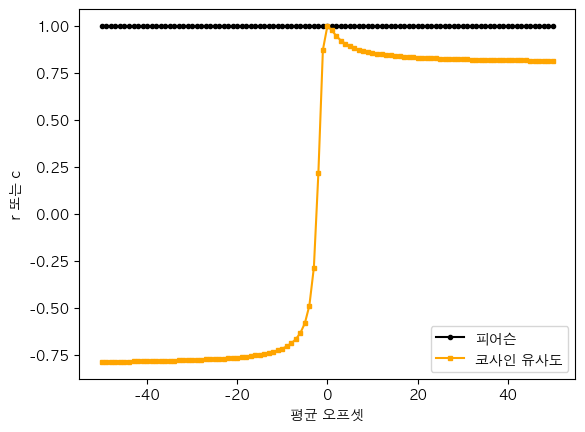

In [17]:
# Plotting

plt.plot(offsets, results[:, 0], color='black', marker='o', markersize=3, label='피어슨')
plt.plot(offsets, results[:, 1], color='orange', marker='s', markersize=3, label='코사인 유사도')

plt.xlabel('평균 오프셋')
plt.ylabel('r 또는 c')
plt.legend()

plt.show()